In [229]:
import pandas_datareader
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [231]:
start ='1926-01-01'

In [232]:
ff=pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()

/tmp/ipython-input-3386586598.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff=pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()
/tmp/ipython-input-3386586598.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff=pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()


In [233]:
ff_df=ff[0]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

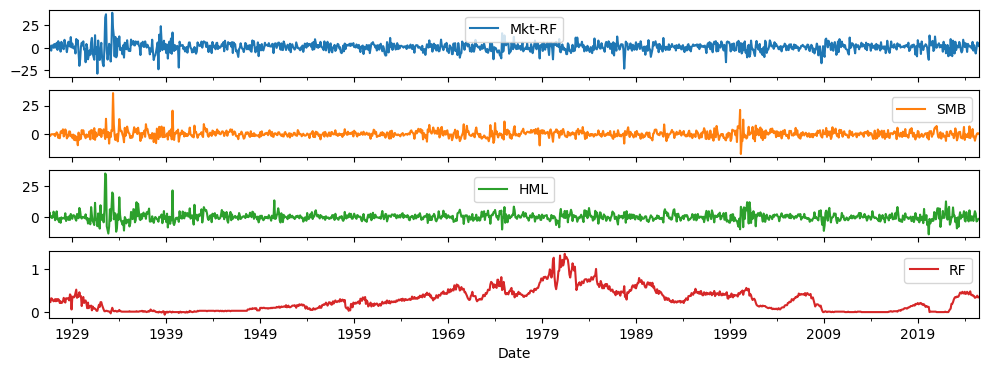

In [234]:
ff_df.plot(subplots=True,figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

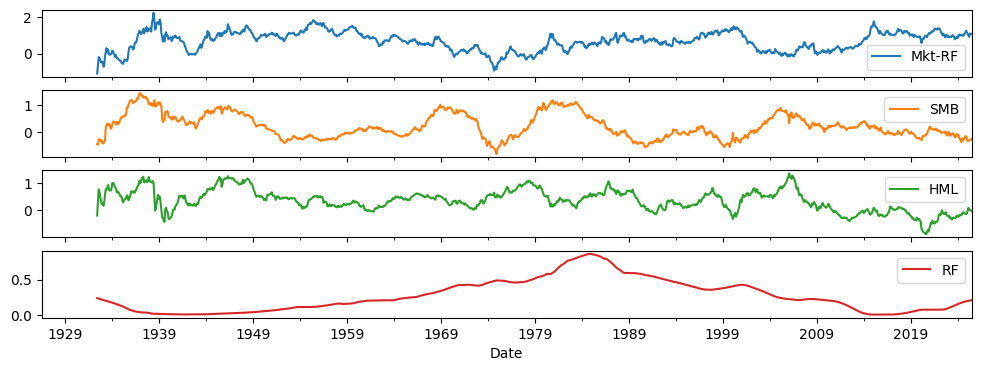

In [235]:
ff_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [236]:
ff_mom_df=pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]

/tmp/ipython-input-915058008.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df=pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]
/tmp/ipython-input-915058008.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df=pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]


array([<Axes: xlabel='Date'>], dtype=object)

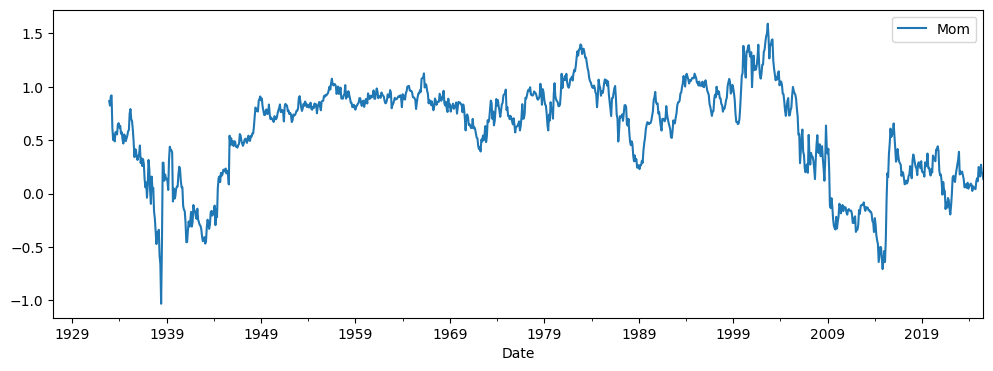

In [237]:
ff_mom_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [238]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.89,-2.55,-2.39,0.22
1926-08,2.64,-1.14,3.81,0.25
1926-09,0.38,-1.36,0.05,0.23
1926-10,-3.27,-0.14,0.82,0.32
1926-11,2.54,-0.11,-0.61,0.31
...,...,...,...,...
2025-03,-6.39,-2.76,2.90,0.34
2025-04,-0.84,-0.59,-3.40,0.35
2025-05,6.06,0.70,-2.88,0.38


In [239]:
ff_mom_df

,Mom
Date,
1927-01,0.57
1927-02,-1.50
1927-03,3.52
1927-04,4.36
1927-05,2.78
...,...
2025-03,-2.84
2025-04,4.97
2025-05,2.21


In [240]:
ffac_merged_df=pd.merge(ff_df,ff_mom_df,on='Date',how='inner',sort=True,copy=True,indicator=False,validate='one_to_one')

In [241]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.05,-0.32,4.58,0.25,0.57
1927-02,4.17,0.07,2.72,0.26,-1.50
1927-03,0.14,-1.77,-2.38,0.30,3.52
1927-04,0.47,0.39,0.65,0.25,4.36
1927-05,5.45,1.55,4.80,0.30,2.78
...,...,...,...,...,...
2025-03,-6.39,-2.76,2.90,0.34,-2.84
2025-04,-0.84,-0.59,-3.40,0.35,4.97
2025-05,6.06,0.70,-2.88,0.38,2.21


In [242]:
!pip install --upgrade yfinance


In [243]:
import yfinance as yf

AAPL_df = yf.download("AAPL", start=start, auto_adjust=False)['Adj Close'].resample('M').ffill().pct_change()
print(AAPL_df.head())


[*********************100%***********************]  1 of 1 completed

Ticker          AAPL
Date                
1980-12-31       NaN
1981-01-31 -0.172163
1981-02-28 -0.061943
1981-03-31 -0.075475
1981-04-30  0.158162



/tmp/ipython-input-426570647.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  AAPL_df = yf.download("AAPL", start=start, auto_adjust=False)['Adj Close'].resample('M').ffill().pct_change()


In [244]:
AAPL_df

Ticker,AAPL
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2025-05-31,-0.053584
2025-06-30,0.021509
2025-07-31,0.011698


In [245]:
AAPL_df['str_date']=AAPL_df.index.astype(str)
AAPL_df['dt_date']=pd.to_datetime(AAPL_df['str_date']).dt.strftime('%y-%m')
AAPL_df.dt_date.dtype

dtype('O')

In [246]:
ffac = ffac_merged_df.copy()
ffac = ffac.reset_index()


In [247]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.05,-0.32,4.58,0.25,0.57
1927-02,4.17,0.07,2.72,0.26,-1.50
1927-03,0.14,-1.77,-2.38,0.30,3.52
1927-04,0.47,0.39,0.65,0.25,4.36
1927-05,5.45,1.55,4.80,0.30,2.78
...,...,...,...,...,...
2025-03,-6.39,-2.76,2.90,0.34,-2.84
2025-04,-0.84,-0.59,-3.40,0.35,4.97
2025-05,6.06,0.70,-2.88,0.38,2.21


In [248]:
ffac['Date_str'] = ffac['Date'].dt.strftime('%y-%m')
ffac_merged_df = ffac_merged_df.reset_index()
print(ffac.head())


      Date  Mkt-RF   SMB   HML    RF   Mom Date_str
0  1927-01   -0.05 -0.32  4.58  0.25  0.57    27-01
1  1927-02    4.17  0.07  2.72  0.26 -1.50    27-02
2  1927-03    0.14 -1.77 -2.38  0.30  3.52    27-03
3  1927-04    0.47  0.39  0.65  0.25  4.36    27-04
4  1927-05    5.45  1.55  4.80  0.30  2.78    27-05


In [249]:

# If Date is already a Timestamp, just format as string if needed
ffac_merged_df['Date_str'] = ffac_merged_df['Date'].dt.strftime('%y-%m')

# Check types
print(ffac_merged_df['Date'].dtype)      # datetime64[ns]
print(ffac_merged_df['Date_str'].dtype)  # object


period[M]
object


In [259]:
AAPL_df_single_level = AAPL_df.copy()
AAPL_df_single_level.reset_index().info()
ffac_merged_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      538 non-null    datetime64[ns]
 1   AAPL      537 non-null    float64       
 2   str_date  538 non-null    object        
 3   dt_date   538 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 16.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   Date      1183 non-null   period[M]
 1   Mkt-RF    1183 non-null   float64  
 2   SMB       1183 non-null   float64  
 3   HML       1183 non-null   float64  
 4   RF        1183 non-null   float64  
 5   Mom       1183 non-null   float64  
 6   Date_str  1183 non-null   object   
dtypes: float64(5), object(1), period[M](1)
memory usage: 64.8+ KB


In [262]:
# Assume aapl_df has the daily data and ffac_merged_df has the monthly data
aapl_df = AAPL_df_single_level.reset_index()

# --- Step 1: Ensure date columns are the correct type ---
# Convert AAPL's 'Date' column to a proper datetime object
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
# Let's assume ffac_merged_df's date column is already Period[M] and is named 'Date'

# --- Step 2: Create a common 'Month' key in both DataFrames ---
# Create the 'Month' column from the daily data in aapl_df
aapl_df['Month'] = aapl_df['Date'].dt.to_period('M')

# For clarity, rename the Period[M] column in ffac_merged_df to 'Month' as well
# (If it's already named 'Month', you can skip this line)
ffac_merged_df = ffac_merged_df.rename(columns={'Date': 'Month'})


# --- Step 3: Merge on the new 'Month' column ---
# Note: I removed `validate='one_to_one'` because you now have many daily
# records mapping to one monthly record ('many_to_one').
AAPL_ffac_merge_df = pd.merge(
    aapl_df,
    ffac_merged_df,
    on='Month',        # Merge on the common month period
    how='inner'
)

# --- Display the result ---
print(AAPL_ffac_merge_df.head())

        Date      AAPL    str_date dt_date    Month  Mkt-RF   SMB   HML    RF  \
0 1980-12-31       NaN  1980-12-31   80-12  1980-12   -4.46 -0.28  2.80  1.31   
1 1981-01-31 -0.172163  1981-01-31   81-01  1981-01   -5.06  2.91  6.74  1.04   
2 1981-02-28 -0.061943  1981-02-28   81-02  1981-02    0.61 -0.47  0.97  1.07   
3 1981-03-31 -0.075475  1981-03-31   81-03  1981-03    3.67  3.34  0.61  1.21   
4 1981-04-30  0.158162  1981-04-30   81-04  1981-04   -2.16  4.50  2.28  1.08   

    Mom Date_str  
0 -6.71    80-12  
1 -7.82    81-01  
2 -1.35    81-02  
3  0.82    81-03  
4 -1.08    81-04  


In [263]:
AAPL_ffac_merge_df

,Date,AAPL,str_date,dt_date,Month,Mkt-RF,SMB,HML,RF,Mom,Date_str
0,1980-12-31,NaN,1980-12-31,80-12,1980-12,-4.46,-0.28,2.80,1.31,-6.71,80-12
1,1981-01-31,-0.172163,1981-01-31,81-01,1981-01,-5.06,2.91,6.74,1.04,-7.82,81-01
2,1981-02-28,-0.061943,1981-02-28,81-02,1981-02,0.61,-0.47,0.97,1.07,-1.35,81-02
3,1981-03-31,-0.075475,1981-03-31,81-03,1981-03,3.67,3.34,0.61,1.21,0.82,81-03
4,1981-04-30,0.158162,1981-04-30,81-04,1981-04,-2.16,4.50,2.28,1.08,-1.08,81-04
...,...,...,...,...,...,...,...,...,...,...,...
531,2025-03-31,-0.081500,2025-03-31,25-03,2025-03,-6.39,-2.76,2.90,0.34,-2.84,25-03
532,2025-04-30,-0.043353,2025-04-30,25-04,2025-04,-0.84,-0.59,-3.40,0.35,4.97,25-04
533,2025-05-31,-0.053584,2025-05-31,25-05,2025-05,6.06,0.70,-2.88,0.38,2.21,25-05
534,2025-06-30,0.021509,2025-06-30,25-06,2025-06,4.86,0.83,-1.60,0.34,-2.64,25-06


In [265]:
print("AAPL_df index:")
AAPL_df.index
print("\nffac_merged_df index:")
ffac_merged_df.index

AAPL_df index:

ffac_merged_df index:


RangeIndex(start=0, stop=1183, step=1)

In [266]:
AAPL_ffac_merge_df
print(AAPL_ffac_merge_df.columns.tolist())


['Date', 'AAPL', 'str_date', 'dt_date', 'Month', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom', 'Date_str']


In [267]:
AAPL_ffac_merge_df.drop(columns=['str_date'],inplace=True)

In [268]:
AAPL_ffac_merge_df.rename(columns={'Adj Close':'AAPL_Adj_Close'},inplace=True)

In [269]:
AAPL_ffac_merge_df['AAPL_RF']=AAPL_ffac_merge_df['AAPL']*100-AAPL_ffac_merge_df['RF']

In [270]:
#AAPL_ffac_merge_df.dropna(axis=0)
AAPL_ffac_merge_df

,Date,AAPL,dt_date,Month,Mkt-RF,SMB,HML,RF,Mom,Date_str,AAPL_RF
0,1980-12-31,NaN,80-12,1980-12,-4.46,-0.28,2.80,1.31,-6.71,80-12,NaN
1,1981-01-31,-0.172163,81-01,1981-01,-5.06,2.91,6.74,1.04,-7.82,81-01,-18.256332
2,1981-02-28,-0.061943,81-02,1981-02,0.61,-0.47,0.97,1.07,-1.35,81-02,-7.264261
3,1981-03-31,-0.075475,81-03,1981-03,3.67,3.34,0.61,1.21,0.82,81-03,-8.757500
4,1981-04-30,0.158162,81-04,1981-04,-2.16,4.50,2.28,1.08,-1.08,81-04,14.736215
...,...,...,...,...,...,...,...,...,...,...,...
531,2025-03-31,-0.081500,25-03,2025-03,-6.39,-2.76,2.90,0.34,-2.84,25-03,-8.490013
532,2025-04-30,-0.043353,25-04,2025-04,-0.84,-0.59,-3.40,0.35,4.97,25-04,-4.685301
533,2025-05-31,-0.053584,25-05,2025-05,6.06,0.70,-2.88,0.38,2.21,25-05,-5.738407
534,2025-06-30,0.021509,25-06,2025-06,4.86,0.83,-1.60,0.34,-2.64,25-06,1.810854


In [271]:
from statsmodels.formula.api import ols
AAPL_ffac_merge_df = AAPL_ffac_merge_df.rename(columns={'Mkt-RF': 'Mkt_RF'})
results=ols('AAPL_RF ~ Mkt_RF + SMB + HML + Mom', data=AAPL_ffac_merge_df, missing='drop').fit()

In [272]:
list(AAPL_ffac_merge_df)

['Date',
 'AAPL',
 'dt_date',
 'Month',
 'Mkt_RF',
 'SMB',
 'HML',
 'RF',
 'Mom',
 'Date_str',
 'AAPL_RF']

In [274]:
import statsmodels.tools as smtools
AAPL_ffac_merge_df_C=smtools.add_constant(AAPL_ffac_merge_df,prepend=True)

In [275]:
AAPL_ffac_merge_df_C

,const,Date,AAPL,dt_date,Month,Mkt_RF,SMB,HML,RF,Mom,Date_str,AAPL_RF
0,1.0,1980-12-31,NaN,80-12,1980-12,-4.46,-0.28,2.80,1.31,-6.71,80-12,NaN
1,1.0,1981-01-31,-0.172163,81-01,1981-01,-5.06,2.91,6.74,1.04,-7.82,81-01,-18.256332
2,1.0,1981-02-28,-0.061943,81-02,1981-02,0.61,-0.47,0.97,1.07,-1.35,81-02,-7.264261
3,1.0,1981-03-31,-0.075475,81-03,1981-03,3.67,3.34,0.61,1.21,0.82,81-03,-8.757500
4,1.0,1981-04-30,0.158162,81-04,1981-04,-2.16,4.50,2.28,1.08,-1.08,81-04,14.736215
...,...,...,...,...,...,...,...,...,...,...,...,...
531,1.0,2025-03-31,-0.081500,25-03,2025-03,-6.39,-2.76,2.90,0.34,-2.84,25-03,-8.490013
532,1.0,2025-04-30,-0.043353,25-04,2025-04,-0.84,-0.59,-3.40,0.35,4.97,25-04,-4.685301
533,1.0,2025-05-31,-0.053584,25-05,2025-05,6.06,0.70,-2.88,0.38,2.21,25-05,-5.738407
534,1.0,2025-06-30,0.021509,25-06,2025-06,4.86,0.83,-1.60,0.34,-2.64,25-06,1.810854


In [276]:
from statsmodels.regression.linear_model import OLS
results= OLS(AAPL_ffac_merge_df_C['AAPL_RF'],AAPL_ffac_merge_df_C[['const','Mkt_RF','SMB','HML','Mom']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     52.12
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           5.02e-37
Time:                        23:24:39   Log-Likelihood:                -2026.4
No. Observations:                 535   AIC:                             4063.
Df Residuals:                     530   BIC:                             4084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3305      0.480      2.771      0.006       0.387       2.274
Mkt_RF         1.1825      0.112     10.575      0.000       0.963       1.402
SMB            0.2313      0.163      1.422      0.156      -0.088       0.551
HML           -0.8678      0.159     -5.464      0.000      -1.180      -0.556
Mom           -0.1169      0.113     -1.035      0.301      -0.339       0.105
==============================================================================
Omnibus:                       16.927   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.299
Skew:                          -0.034   Prob(JB):                     7.95e-09
Kurtosis:                       4.292   Cond. No.                         5.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""